<a href="https://colab.research.google.com/github/prtk0007/Pneumonia-Covid19-detection/blob/main/Binary_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"
# !kaggle datasets download -d paultimothymooney/chest-xray-pneumonia
! kaggle datasets download -d pcbreviglieri/pneumonia-xray-images
!unzip \*.zip

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = [224, 224]

train_path = '/content/chest_xray/chest_xray/train'
valid_path = '/content/chest_xray/chest_xray/test'

In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/Kaggle/chest_xray/chest_xray/train/*')
folders

['/content/Kaggle/chest_xray/chest_xray/train/NORMAL',
 '/content/Kaggle/chest_xray/chest_xray/train/PNEUMONIA']

In [ ]:
from keras.layers import Dropout
x = Flatten(name='flatten')(vgg.output)
x = Dense(256, activation='relu', name='fc1')(x)
x = Dropout(0.4, name='drop1')(x)
x = Dense(256, activation='relu', name='fc2')(x)
x = Dropout(0.1, name='drop2')(x)
x = Dense(1, activation='sigmoid', name='predictions')(x)

In [ ]:
model = Model(inputs=vgg.input, outputs=x)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:

model.compile(
  loss='binary_crossentropy',
  optimizer= 'adam',
  metrics=['accuracy']
)

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)


In [ ]:
training_set = train_datagen.flow_from_directory('/content/train',
                                                 target_size = (224, 224),
                                                 batch_size = 64,
                                                 class_mode = 'binary')

Found 4192 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/test',
                                            target_size = (224, 224),
                                            batch_size = 64,
                                            shuffle=False,
                                            class_mode = 'binary')

Found 624 images belonging to 2 classes.


In [ ]:
val_set = val_datagen.flow_from_directory('/content/val',
                                            target_size = (224, 224),
                                            batch_size = 64,
                                            class_mode = 'binary')

Found 1040 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
early = EarlyStopping(monitor='val_accuracy', mode='max', patience=5)
#learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience = 2, verbose=1,factor=0.3, min_lr=0.0001)
callbacks_list = [ early ]

In [ ]:
r = model.fit(
  training_set,
  validation_data=val_set,
  epochs=20,
  callbacks=callbacks_list
)

Epoch 1/20
66/66 [==============================] - 91s 1s/step - loss: 0.5081 - accuracy: 0.7983 - val_loss: 0.1184 - val_accuracy: 0.9538
Epoch 2/20
66/66 [==============================] - 90s 1s/step - loss: 0.1825 - accuracy: 0.9361 - val_loss: 0.1162 - val_accuracy: 0.9587
Epoch 3/20
66/66 [==============================] - 90s 1s/step - loss: 0.1539 - accuracy: 0.9399 - val_loss: 0.1135 - val_accuracy: 0.9538
Epoch 4/20
66/66 [==============================] - 90s 1s/step - loss: 0.1356 - accuracy: 0.9520 - val_loss: 0.1352 - val_accuracy: 0.9433
Epoch 5/20
66/66 [==============================] - 91s 1s/step - loss: 0.1245 - accuracy: 0.9569 - val_loss: 0.1166 - val_accuracy: 0.9529
Epoch 6/20
66/66 [==============================] - 90s 1s/step - loss: 0.1150 - accuracy: 0.9586 - val_loss: 0.1262 - val_accuracy: 0.9442
Epoch 7/20
66/66 [==============================] - 90s 1s/step - loss: 0.1095 - accuracy: 0.9617 - val_loss: 0.1140 - val_accuracy: 0.9596
Epoch 8/20
66/66 [==

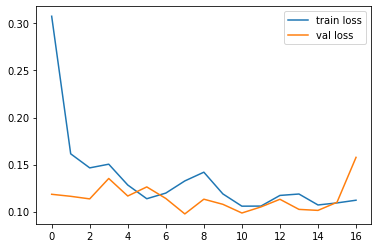

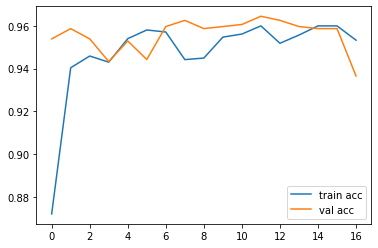

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
model.evaluate(training_set)

66/66 [==============================] - 79s 1s/step - loss: 0.0795 - accuracy: 0.9683


[0.0794895738363266, 0.9682729244232178]

In [ ]:
model.evaluate(test_set)

10/10 [==============================] - 6s 510ms/step - loss: 0.2637 - accuracy: 0.9183


[0.26372236013412476, 0.9182692170143127]

In [ ]:
preds_binary = model.predict(test_set,verbose=1)


10/10 [==============================] - 6s 535ms/step


In [ ]:
predictions = preds_binary.copy()
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1

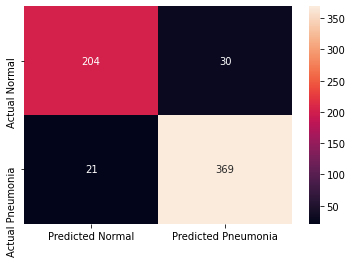

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
import pandas as pd
cm = pd.DataFrame(data=confusion_matrix(test_set.classes, predictions, labels=[0, 1]),index=["Actual Normal", "Actual Pneumonia"],
columns=["Predicted Normal", "Predicted Pneumonia"])
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="d")

In [ ]:
print(classification_report(y_true=test_set.classes,y_pred=predictions,target_names =['NORMAL','PNEUMONIA']))

              precision    recall  f1-score   support

      NORMAL       0.91      0.87      0.89       234
   PNEUMONIA       0.92      0.95      0.94       390

    accuracy                           0.92       624
   macro avg       0.92      0.91      0.91       624
weighted avg       0.92      0.92      0.92       624



In [ ]:
import matplotlib.pyplot as plt #For Visualization
import numpy as np
test_set.reset()
x=np.concatenate([test_set.next()[0] for i in range(test_set.__len__())])
y=np.concatenate([test_set.next()[1] for i in range(test_set.__len__())])
print(x.shape)
print(y.shape)

(624, 224, 224, 3)
(624,)


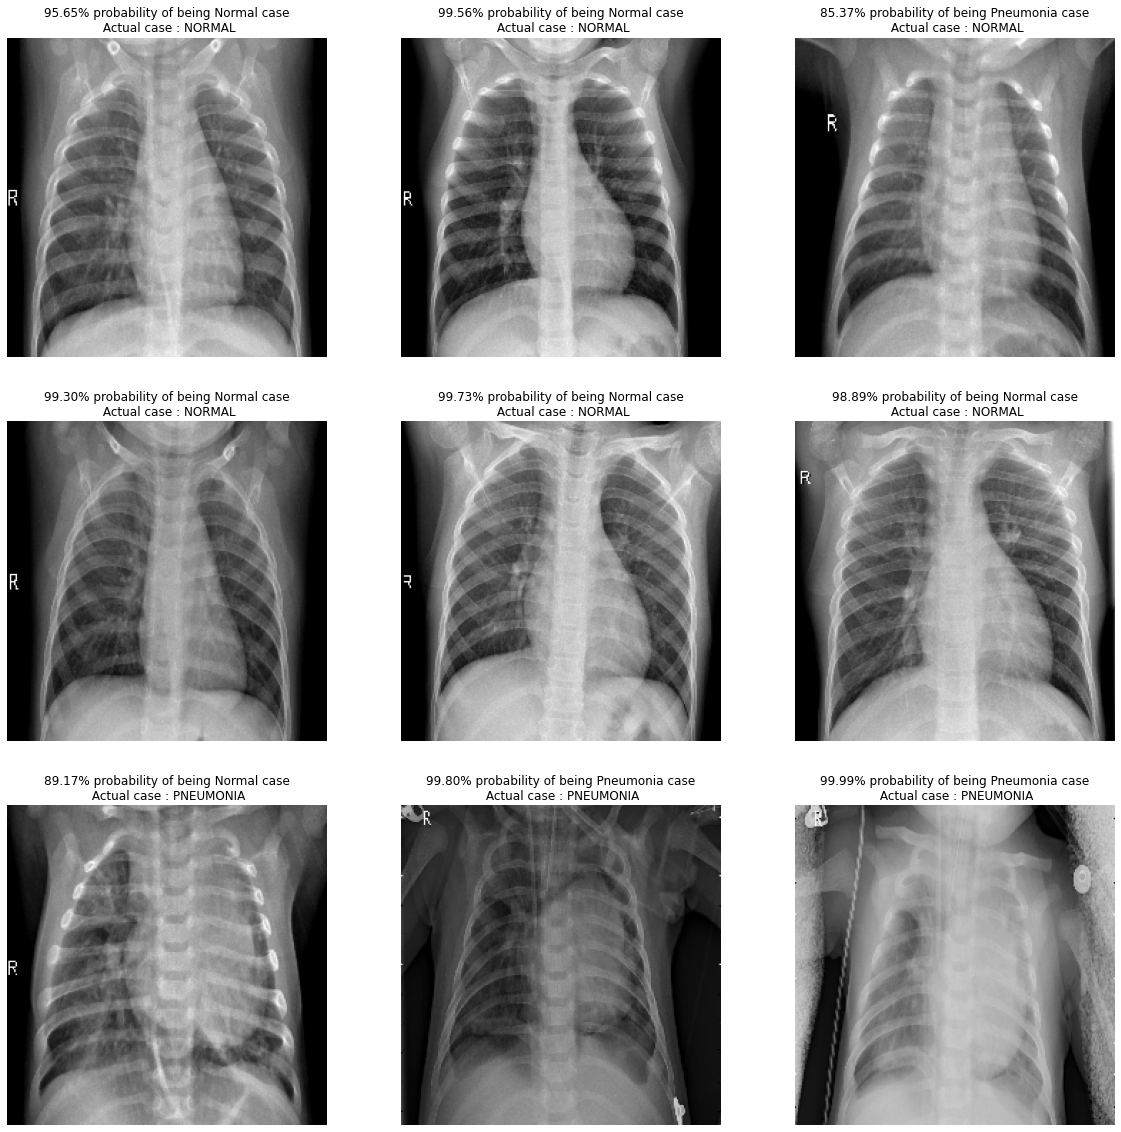

In [ ]:
dic = {0:'NORMAL', 1:'PNEUMONIA'}
plt.figure(figsize=(20,20))
for i in range(0+228, 9+228):
  plt.subplot(3, 3, (i-228)+1)
  if preds_binary[i, 0] >= 0.5: 
      out = ('{:.2%} probability of being Pneumonia case'.format(preds_binary[i][0]))
      
      
  else: 
      out = ('{:.2%} probability of being Normal case'.format(1-preds_binary[i][0]))
      
      

  plt.title(out+"\n Actual case : "+ dic.get(y[i]))    
  plt.imshow(np.squeeze(x[i]))
  plt.axis('off')
plt.show()

In [ ]:
%cd /content/drive/MyDrive/Kaggle
%ls

/content/drive/MyDrive/Kaggle
AccVal_acc.png  Inceptv3_xray.h5  LossVal_loss.png  model_vgg19.h5
chest_xray/     kaggle.json       model_vgg16.h5


In [ ]:

from keras.models import load_model

model.save('model_vgg16_Precision_85.h5')

In [ ]:
import keras.backend as K
print(K.eval(model.optimizer.lr))

1e-04
